In [1]:
pip install requests web3

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 1.4 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 1.3 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.4 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/580.7 kB ? eta -:--:--
   ------------------ --------------------- 262.1/580.7 kB ? eta -:--:--
   ---------------------------------------- 580.7/580.7 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 1.5 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.8

In [1]:
# Cell 1: Verify installations
import requests
import web3
print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
# Cell 2: Test API connection
url = "https://ledger.sidrachain.com/api/v2/transactions?limit=50"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print("Sample transaction:", data["items"][0])  # Print first transaction
else:
    print(f"API Error: {response.status_code}")

Sample transaction: {'priority_fee': None, 'tx_burnt_fee': None, 'raw_input': '0x', 'result': 'success', 'hash': '0x3acbf209bbe5bc14c7b068c0e96974ca14c72510dc197c6fe56439c5aa4d7f96', 'max_fee_per_gas': None, 'revert_reason': None, 'confirmation_duration': [0, 2000.0], 'transaction_burnt_fee': None, 'type': 0, 'token_transfers_overflow': None, 'confirmations': 1, 'position': 6, 'max_priority_fee_per_gas': None, 'transaction_tag': None, 'created_contract': None, 'value': '434000000000000000000', 'from': {'ens_domain_name': None, 'hash': '0x1F16e7AAc883559df1BC992b9577Ae5ccaCC1321', 'implementations': [], 'is_contract': False, 'is_scam': False, 'is_verified': False, 'metadata': None, 'name': None, 'private_tags': [], 'proxy_type': None, 'public_tags': [], 'watchlist_names': []}, 'gas_used': '21000', 'status': 'ok', 'to': {'ens_domain_name': None, 'hash': '0xaf410154C432483E42Aa688Dd0feEbAe681AE6dE', 'implementations': [], 'is_contract': False, 'is_scam': False, 'is_verified': False, 'meta

In [6]:
import requests
import time

def poll_transactions(limit=10, interval=5):
    url = f"https://ledger.sidrachain.com/api/v2/transactions?limit={limit}"
    headers = {"User-Agent": "LedgerAnalysis/1.0"}
    last_tx_hash = None

    while True:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            data = response.json()
            transactions = data.get("items", [])  # Adjust key if different
            for tx in transactions:
                tx_hash = tx["hash"]
                if tx_hash != last_tx_hash:
                    print(f"New Tx: {tx_hash}, From: {tx['from']['hash']}, Value: {tx['value']}")
                    last_tx_hash = tx_hash
        else:
            print(f"Error {response.status_code}: {response.text}")
        time.sleep(interval)

# Test briefly (interrupt with Jupyter’s stop button)
poll_transactions(limit=10, interval=5)

New Tx: 0xed91e34d7e78216142cdf8ebe742185d8ae8f83d30ebff76d1be8460b3fa15a0, From: 0xc244807C04eeDBa948e1A312A31a78C77D4Eb752, Value: 0
New Tx: 0xbebf4a628c83c8b126f55e250c54c3acebb99c635383cf7f69620d0cd2dd389a, From: 0xdC24995e083a1b9fD80431C8D4fdd425183901C8, Value: 10000000000000000000
New Tx: 0xfba94542c1a32de40ae146fc4abd873833f396d05e15500816d8977c00067ba8, From: 0xC9984De93Fec1FEF18441baA62fEC47a3B1eD835, Value: 26000000000000000000
New Tx: 0x4442b8d0b671e69ee05d520bce0fce15ed0ddb6904dd22cba5824a10441e69a5, From: 0x3b2a5D71bad38C03f442e0e431bccE3AC9e58611, Value: 413000000000000000000
New Tx: 0x0aa1aa449af274aebc17fb354b739463f2301745d754978401c4f69cc799ef38, From: 0x370aB7De14416f2439D1e4914558ad3B14679dc9, Value: 0
New Tx: 0xbc83a63d5606538aca0539fe9ebaf23b9a32acaf989e4f49c9bece2af6e67b86, From: 0xa1A2Be925695891D3B75899435E390fa4cf9818B, Value: 109000000000000000000
New Tx: 0x505accba086fa5e2850f0755f22cdd697352af775cff0535eea451a5aff559b5, From: 0xbb2C8576B6b7B176A1Da4C5d034e

KeyboardInterrupt: 

In [8]:
from collections import defaultdict

def analyze_transactions(limit=10, iterations=5):
    url = f"https://ledger.sidrachain.com/api/v2/transactions?limit={limit}"
    headers = {"User-Agent": "LedgerAnalysis/1.0"}
    last_tx_hash = None
    address_counts = defaultdict(int)
    total_value = 0

    for _ in range(iterations):  # Limited for testing
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            transactions = response.json().get("items", [])
            for tx in transactions:
                tx_hash = tx["hash"]
                if tx_hash != last_tx_hash:
                    value = int(tx["value"]) / 1e18  # Adjust for decimals (check token unit)
                    total_value += value
                    address_counts[tx["from"]["hash"]] += 1
                    last_tx_hash = tx_hash
            print(f"Total Value: {total_value:.4f}, Active Addresses: {len(address_counts)}")
        time.sleep(5)
    return total_value, address_counts

total_val, addr_counts = analyze_transactions()

Total Value: 3243.6800, Active Addresses: 26
Total Value: 6212.3600, Active Addresses: 26
Total Value: 9268.0450, Active Addresses: 29
Total Value: 12474.6500, Active Addresses: 37
Total Value: 17494.2550, Active Addresses: 38


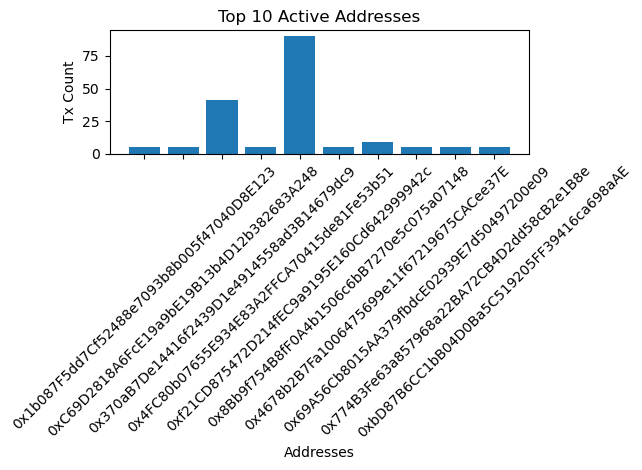

Total Transaction Value: 17494.2550


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

addresses = list(addr_counts.keys())[:10]  # Top 10
counts = [addr_counts[addr] for addr in addresses]

plt.bar(addresses, counts)
plt.xlabel("Addresses")
plt.ylabel("Tx Count")
plt.title("Top 10 Active Addresses")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Total Transaction Value: {total_val:.4f}")

In [10]:
with open("sidra_ledger_v2.txt", "w") as f:
    f.write(f"Total Value: {total_val:.4f}\n")
    f.write("Address Counts:\n")
    for addr, count in addr_counts.items():
        f.write(f"{addr}: {count}\n")
print("Saved to sidra_ledger_v2.txt")

Saved to sidra_ledger_v2.txt
